In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes = True)

In [3]:
df = pd.read_csv("C:/Users/pranay/Downloads/Salary_Data.csv")

In [4]:
df.head(5)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
df.tail(5)

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [7]:
df.shape

(30, 2)

<AxesSubplot:>

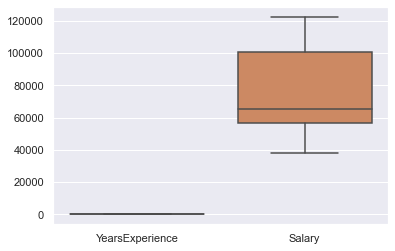

In [8]:
sns.boxplot(data = df)

In [39]:
duplicate_rows_df  = df[df.duplicated()]
print(duplicate_rows_df.shape)

(0, 2)


In [9]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [10]:
x = df["Salary"]
y = df["YearsExperience"]
import statsmodels.formula.api as smf
model = smf.ols("x~y", data = df).fit()

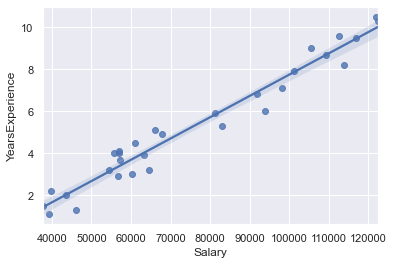

In [11]:
sns.regplot(x= df["Salary"], y=df["YearsExperience"], data=df);

In [12]:
model.params

Intercept    25792.200199
y             9449.962321
dtype: float64

In [13]:
print(model.tvalues, '\n', model.pvalues)    

Intercept    11.346940
y            24.950094
dtype: float64 
 Intercept    5.511950e-12
y            1.143068e-20
dtype: float64


In [25]:
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

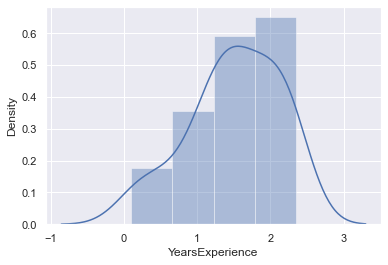

In [22]:
#log model
df_log = np.log(df)
sns.distplot(df_log['YearsExperience'],kde=True)

In [34]:
x1 = df["Salary"]
y1 = df["YearsExperience"]
import statsmodels.formula.api as smf
model_log = smf.ols("x1~y1", data = df_log).fit()

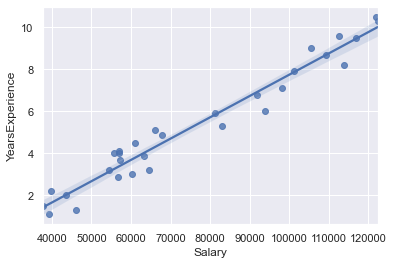

In [35]:
sns.regplot(x= df["Salary"], y=df["YearsExperience"], data=df_log);

In [29]:
(model_log.rsquared,model_log.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

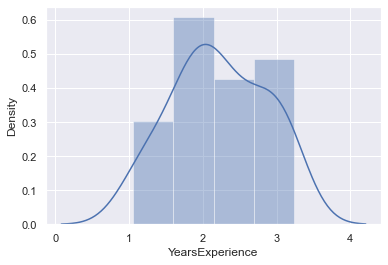

In [33]:
# sqrt model
df_sqrt = np.sqrt(df)
sns.distplot(df_sqrt['YearsExperience'],kde=True)

In [36]:
x2 = df["Salary"]
y2 = df["YearsExperience"]
import statsmodels.formula.api as smf
model_sqrt = smf.ols("x2~y2", data = df_sqrt).fit()

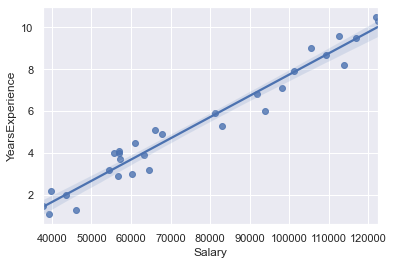

In [37]:
sns.regplot(x= df["Salary"], y=df["YearsExperience"], data=df_log);

In [38]:
(model_sqrt.rsquared,model_sqrt.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

In [39]:
# r2 and adjr2 is same for all the models

In [43]:
newdata=pd.Series([1.1,1.3,1.5,2,2.2,2.9,3,3.2,3.2,3.7,3.9,4,4,4.1,4.5,4.9,5.1,5.3,5.9,6,6.8,7.1,7.9,8.2,8.7,9,9.5,9.6,10.3,10.5])

In [44]:
data_pred=pd.DataFrame(newdata,columns=["y"])

In [45]:
pred_val = model.predict(data_pred) 

In [46]:
from sklearn import metrics

In [49]:
print('Mean Squared Error:', metrics.mean_squared_error(x,pred_val))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(x,pred_val)))

Mean Squared Error: 31270951.72228097
Root Mean Squared Error: 5592.043608760662
